In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import autogluon as ag
from autogluon import TabularPrediction as task
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
import itertools

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap,origin='lower')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i+0.1, cm[i, j],
                               color= "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
df = pd.read_csv("D:\\creditcard.csv",index_col="ID")
categorical_columns =['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df=pd.get_dummies(df,columns=categorical_columns)

In [4]:
df.columns
df.head()


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,1,0,0,0,0,0,0,0,0,0
2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
data=pd.DataFrame(scale(df.loc[:,['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]))
data.columns=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
data.head(1)
df.loc[:,['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=data
df.head(1)
df.columns
df=df.dropna(axis=0,how="any")
train_data,test_data=train_test_split(df,test_size=0.2,random_state=123,shuffle=True)
X=df.drop(['default.payment.next.month'],axis=1)
y=df.loc[:,['default.payment.next.month']]
y.columns
y.head()

,default.payment.next.month
ID,
1,1
2,1
3,0
4,0
5,0


In [6]:
#Auto-GLuon without setting parameters
label_column='default.payment.next.month'
print("Summary of class variable: \n", train_data[label_column].describe())
dir = 'agModels-predictClass' # specifies folder where to store trained models
predictor = task.fit(train_data=train_data, label=label_column, output_directory=dir)


Beginning AutoGluon training ...
AutoGluon will save models to agModels-predictClass/
Preprocessing data ...
Here are the first 10 unique label values in your data:  [0 1]
AutoGluon infers your prediction problem is: binary  (because only two unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Selected class <--> label mapping:  class 1 = True, class 0 = False


Summary of class variable: 
 count    24000.000000
mean         0.222167
std          0.415711
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64


	Data preprocessing and feature engineering runtime = 0.47s ...
AutoGluon will gauge predictive performance using evaluation metric: accuracy
To change this, specify the eval_metric argument of fit()
C:\Users\Administrator\Anaconda3\lib\imp.py:342: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return _load(spec)
Fitting model: RandomForestClassifierGini ...
	8.52s	 = Training runtime
	0.8229	 = Validation accuracy score
Fitting model: RandomForestClassifierEntr ...
	11.28s	 = Training runtime
	0.8212	 = Validation accuracy score
Fitting model: ExtraTreesClassifierGini ...
	Not enough memory to train model... Skipping ExtraTreesClassifierGini.
Fitting model: ExtraTreesClassifierEntr ...
	Not enough memory to train model... Skipping ExtraTreesClassifierEntr.
Fitting model: KNeighborsClassifierUnif ...
	0.24s	 = Training runtime
	0.7887	 = Validation accuracy score
Fitting model: KNeigh

In [6]:
#Auto-GLuon with setting parameters
label_column='default.payment.next.month'
dir = 'agModels-predictClass' # specifies folder where to store trained models
hp_tune = True  # whether or not to do hyperparameter optimization

nn_options = { # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10, # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'), # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100],[1000],[200,100],[300,200,100]),
      # Each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), # dropout probability (real-valued hyperparameter)
}

gbm_options = { # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100, # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36), # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {'NN': nn_options, 'GBM': gbm_options}  # hyperparameters of each model type
# If one of these keys is missing from hyperparameters dict, then no models of that type are trained.

num_trials = 5  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine
predictor = task.fit(train_data=train_data, label=label_column, output_directory=dir, num_trials=num_trials,hyperparameter_tune=True, hyperparameters=hyperparameters)
#There may exist the error :Exception in worker process: Can't pickle local object 'TaskScheduler._run_dist_job.<locals>._worker'
#If this section of codes doesn't work, keep moving

Beginning AutoGluon training ...
AutoGluon will save models to agModels-predictClass/
Preprocessing data ...
Here are the first 10 unique label values in your data:  [1 0]
AutoGluon infers your prediction problem is: binary  (because only two unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Selected class <--> label mapping:  class 1 = True, class 0 = False
	Data preprocessing and feature engineering runtime = 0.48s ...
AutoGluon will gauge predictive performance using evaluation metric: accuracy
To change this, specify the eval_metric argument of fit()
Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 5


Exception in worker process: Can't pickle local object 'TaskScheduler._run_dist_job.<locals>._worker'


In [ ]:
label_column='default.payment.next.month'
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1) # delete label column to prove we're not cheating
y_pred = predictor.predict(test_data_nolab)


Confusion matrix, without normalization
[[4434  230]
 [ 856  480]]


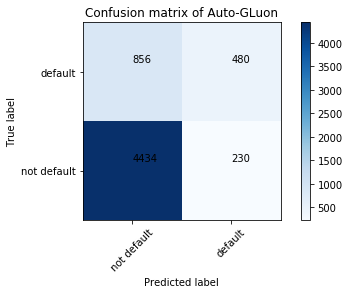

In [35]:
# Plot normalized confusion matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not default','default'], normalize=False,
                      title='Confusion matrix of Auto-GLuon')

plt.show()

In [36]:
roc_auc_score(y_test,y_pred)
#ROC Score 65.32%
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.819000
Evaluations on test data:
{
    "accuracy": 0.819,
    "accuracy_score": 0.819,
    "balanced_accuracy_score": 0.6549837717361161,
    "matthews_corrcoef": 0.39924704557919233,
    "f1_score": 0.819
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.8381852551984877,
        "recall": 0.9506861063464837,
        "f1-score": 0.8908981314044605,
        "support": 4664
    },
    "1": {
        "precision": 0.676056338028169,
        "recall": 0.3592814371257485,
        "f1-score": 0.46920821114369504,
        "support": 1336
    },
    "accuracy": 0.819,
    "macro avg": {
        "precision": 0.7571207966133284,
        "recall": 0.6549837717361161,
        "f1-score": 0.6800531712740778,
        "support": 6000
    },
    "weighted avg": {
        "precision": 0.8020845496418968,
        "recall": 0.819,
        "f1-score": 0.7970018424930634,
        "support": 6000
    }
}


Predictions:   [False False False ... False  True False]


In [11]:
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
#accuracy 82.05%

accuracy: 0.821000


In [37]:
y_pred_prob = predictor.predict_proba(test_data_nolab)
print(y_pred_prob)
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
#auc score 75.23%


# Generate ROC curve values: 
fpr1, tpr1, thresholds = roc_curve(y_test,y_pred_prob )



[0.15078084 0.15426682 0.10118712 ... 0.07355323 0.50949526 0.09083553]
AUC: 0.751575804223457


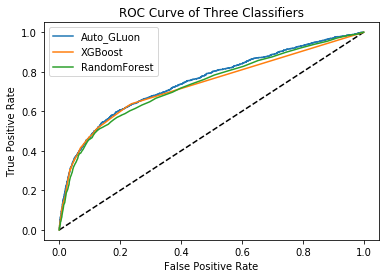

In [45]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr1, tpr1,label="Auto_GLuon")
plt.plot(fpr2, tpr2,label="XGBoost")
plt.plot(fpr3, tpr3,label="RandomForest")
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Three Classifiers')
plt.show()

In [44]:
results = predictor.fit_summary()
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon categorized the features as: ", predictor.feature_types)

*** Summary of fit() ***
Number of models trained: 11
Types of models trained: 
{'RFModel', 'CatboostModel', 'LGBModel', 'WeightedEnsembleModel', 'KNNModel', 'TabularNeuralNetModel'}
Validation performance of individual models: {'RandomForestClassifierGini': 0.8170833333333334, 'RandomForestClassifierEntr': 0.81625, 'ExtraTreesClassifierGini': 0.80625, 'ExtraTreesClassifierEntr': 0.8083333333333333, 'KNeighborsClassifierUnif': 0.7916666666666666, 'KNeighborsClassifierDist': 0.7908333333333334, 'LightGBMClassifier': 0.8295833333333333, 'CatboostClassifier': 0.8254166666666667, 'NeuralNetClassifier': 0.82375, 'LightGBMClassifierCustom': 0.8270833333333333, 'weighted_ensemble_k0_l1': 0.8295833333333333}
Best model (based on validation performance): weighted_ensemble_k0_l1
Hyperparameter-tuning used: False
Bagging used: False 
Stack-ensembling used: False 
User-specified hyperparameters:
{'NN': {'num_epochs': 500}, 'GBM': {'num_boost_round': 10000}, 'CAT': {'iterations': 10000}, 'RF': {'n_

In [ ]:
#XGBoostClassifier
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=123)
model=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(preds)
acc = accuracy_score(y_test,preds)
print("Test set accuracy: {:.2f}".format(acc))

In [ ]:

preds=model.predict(X_test)
print(preds)
acc = accuracy_score(y_test,preds)
print("Test set accuracy: {:.2f}".format(acc))
#accuracy 82%

# Plot normalized confusion matrix
cnf_matrix=confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not default','default'], normalize=False,
                      title='Confusion matrix of XGBoostClassifier')

plt.show()



[0.26510805 0.26510805 0.63441163 ... 0.46892622 0.26510805 0.31626338]


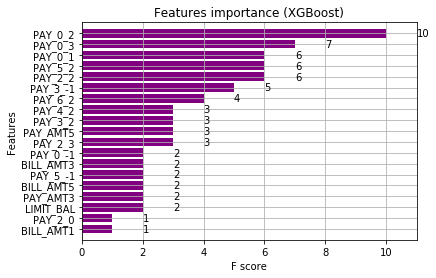

In [14]:


y_pred_prob = model.predict_proba(X_test)[:,1]
print(y_pred_prob)

# Generate ROC curve values: 
fpr2, tpr2, thresholds = roc_curve(y_test,y_pred_prob )


xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)",  color="purple") 


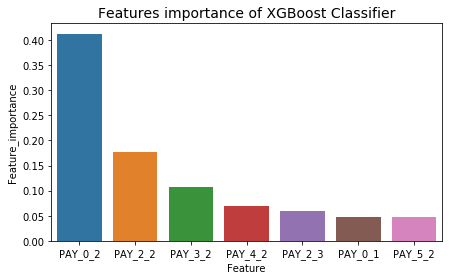

In [43]:
impo=model.feature_importances_

tmp = pd.DataFrame({'Feature': X.columns, 'Feature_importance': impo})
tmp = tmp.sort_values(by='Feature_importance',ascending=False)
tmp=tmp.iloc[:7,:]
tmp.head()
plt.figure(figsize = (7,4))
plt.title('Features importance of XGBoost Classifier',fontsize=14)
s = sns.barplot('Feature','Feature_importance',data=tmp)

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoostClassifier')
plt.show()


In [88]:
y_pred_prob = model.predict_proba(X_test)[:,1]
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
#auc score 73.68%
cv_auc = cross_val_score(model,X,y,cv=5,scoring="roc_auc")
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))
#AUC scores computed using 5-fold cross-validation: 73.10%

AUC: 0.7367737448442104


C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed i

AUC scores computed using 5-fold cross-validation: 0.7309564853985218


In [136]:
#Logistic Regression
df=df.dropna(axis=0,how="any")
X=df.drop(['default.payment.next.month'],axis=1)
y=df.loc[:,['default.payment.next.month']]
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
# Create the classifier: logreg
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg.fit(X_train,y_train)
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: %f" % (accuracy))
#accuracy:82.38%
# Compute and print the confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy: 0.823843
[[8964  395]
 [1718  918]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      9359
           1       0.70      0.35      0.46      2636

    accuracy                           0.82     11995
   macro avg       0.77      0.65      0.68     11995
weighted avg       0.81      0.82      0.80     11995



In [255]:
cnf_matrix=confusion_matrix(y_test, y_pred)



0 0
0 1
1 0
1 1


Confusion matrix, without normalization
[[4466  230]
 [ 837  467]]


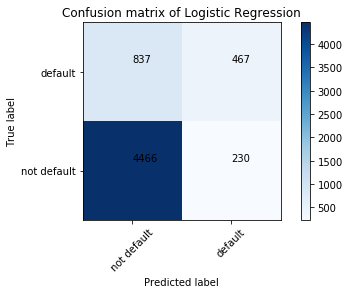

In [258]:
# Plot normalized confusion matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix.shape[0]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not default','default'], normalize=False,
                      title='Confusion matrix of Logistic Regression')

plt.show()

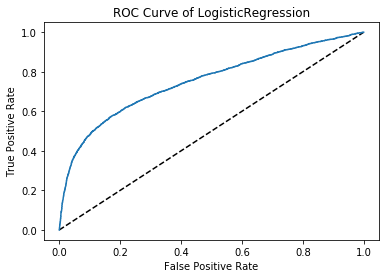

In [100]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# Generate ROC curve values: 
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob )

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LogisticRegression')
plt.show()


In [101]:

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
#auc score 75.18%

AUC: 0.7517645086460963


In [87]:
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring="roc_auc")
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))
#AUC scores computed using 5-fold cross-validation: 74.97%

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Ana

AUC scores computed using 5-fold cross-validation: 0.7496504838156542


In [103]:
#Logistic Regression: Hyperparameter tuning with GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ['l1', 'l2']}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
#Tuned Logistic Regression Parameters: {'C': 1389495.494373136, 'penalty': 'l1'}
#Best score is 0.8214833589008204

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Ana

Tuned Logistic Regression Parameters: {'C': 1389495.494373136, 'penalty': 'l1'}
Best score is 0.8214833589008204


In [106]:

#accuracy of tuned logistic regression is 82.14%
logreg = LogisticRegression(penalty='l1',C=1389495.494373136)
# Fit the classifier to the training data
logreg.fit(X_train,y_train)
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot normalized confusion matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not default','default'], normalize=False,
                      title='Confusion matrix of Logistic Regression with tuned hyperparameters')

plt.show()


[[8967  392]
 [1720  916]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      9359
           1       0.70      0.35      0.46      2636

    accuracy                           0.82     11995
   macro avg       0.77      0.65      0.68     11995
weighted avg       0.81      0.82      0.80     11995



AUC: 0.7514950350875003


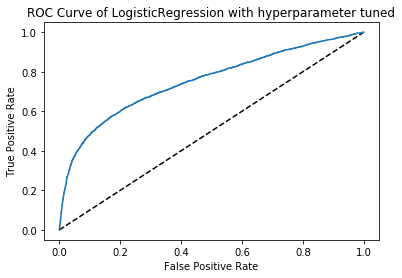

In [110]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
#auc score 75.15%, increased by nearly 1.5% from 73.68% before the hyperparameters are tuned
# Generate ROC curve values: 
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob )

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LogisticRegression with hyperparameter tuned')
plt.show()

In [111]:
#Decision Tree(CART model)
#Hyperparameter tuning with RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
#Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
#Best score is 0.7992396451677449


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
Best score is 0.7992396451677449


In [112]:
#Best CART model:
param_dist = {"max_depth": [ None],
              "max_features": 4,
              "min_samples_leaf": 7,
              "criterion": ["gini"]}
tree = DecisionTreeClassifier(max_depth=None,criterion="gini",max_features=4,min_samples_leaf=7)
tree_cv.fit(X,y)
y_pred = tree_cv.predict(X_test)


In [113]:

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Plot normalized confusion matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not default','default'], normalize=False,
                      title='Confusion matrix of CART model with tuned hyperparameters')

plt.show()

[[9047  312]
 [1788  848]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      9359
           1       0.73      0.32      0.45      2636

    accuracy                           0.82     11995
   macro avg       0.78      0.64      0.67     11995
weighted avg       0.81      0.82      0.80     11995



AUC: 0.7514950350875003


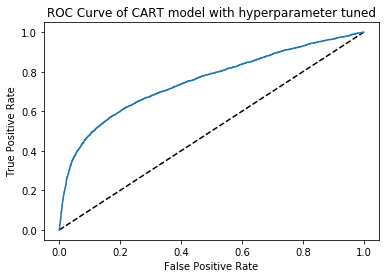

In [115]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
#auc score 75.15%, increased by nearly 1.5% from 73.68% before the hyperparameters are tuned
# Generate ROC curve values: 
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob )

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of CART model with hyperparameter tuned')
plt.show()

In [20]:
#RandomForestClassifier
rm = RandomForestClassifier(
                             random_state=123,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
rm.fit(X_train,y_train)
rm.feature_importances_
y_pred=rm.predict(X_test)


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [22]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rm.predict_proba(X_test)[:,1]
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
roc_auc_score(y_test,y_pred)
#roc score 73.13%

AUC: 0.7345732794702192


0.6466334055730735

accuracy: 0.811000
[[4398  266]
 [ 868  468]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4664
           1       0.64      0.35      0.45      1336

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion matrix, without normalization
[[4398  266]
 [ 868  468]]


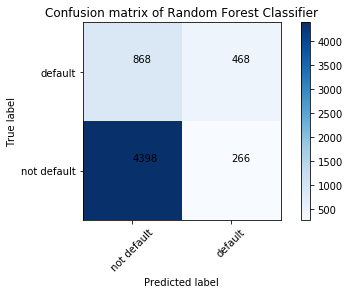

In [23]:
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: %f" % (accuracy))
#81.77%
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Plot normalized confusion matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not default','default'], normalize=False,
                      title='Confusion matrix of Random Forest Classifier')

plt.show()

In [ ]:
fpr3, tpr3, thresholds = roc_curve(y_test,y_pred_prob )

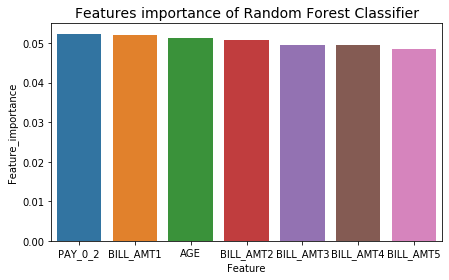

In [130]:

tmp = pd.DataFrame({'Feature': X.columns, 'Feature_importance': rm.feature_importances_})
tmp = tmp.sort_values(by='Feature_importance',ascending=False)
tmp=tmp.iloc[:7,:]
tmp.head()
plt.figure(figsize = (7,4))
plt.title('Features importance of Random Forest Classifier',fontsize=14)
s = sns.barplot('Feature','Feature_importance',data=tmp)